In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out                7/1/2015   Ernest Barnes   
1          Check-Out                7/1/2015    Andrea Baker   
2          Check-Out                7/2/2015  Rebecca Parker   
3          Check-Out                7/2/2015    Laura Murray   
4          Check-Out                7/3/2015     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

# Understand The Data

In [3]:
df.shape

(119390, 36)

In [4]:
pd.set_option('display.max_columns',36)

In [5]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out                7/1/2015   
1                          0          Check-Out                7/1/2015   
2                          0          Check-Out                7/2/2015   
3                          0          Check-Out                7/2/2015   
4                          1          Check-Out                7/3/2015   

             name                        email  phone-number       credit_card  
0   Ernest Barnes  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1    Andrea Baker       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2  Rebecca Parker   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3    Laura Murray            Laura_M@gmail.com  364-656-8427  ************5677  
4     Linda Hines           LHines@verizon.com  713

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [8]:
df.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [9]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

This is no balance dataset, which city hotel number almost 2 times than the resort hotel number.
this is useful to know, when we are creating the model. there are methods where you can actually balance the dataset.

In [10]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

BB = bed and breakfast. HB = breakfast and other (usually dinner). SC & undefined = no breakfast. FB = Fullbreakfast (breakfast, lunch, dinner).

In [11]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [12]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [13]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [14]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [15]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

([<matplotlib.patches.Wedge at 0x22e300b07f0>,
 [Text(-0.956416133381298, -0.5433858480011854, 'Not Canceled'),
  Text(0.9564161333812984, 0.5433858480011848, 'Canceled')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

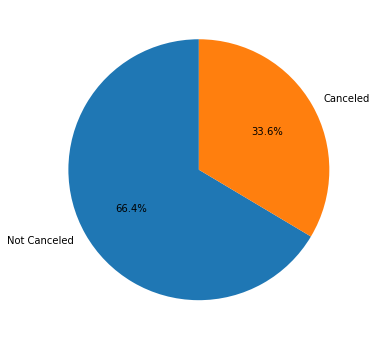

In [16]:
canceled = df['hotel'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(canceled, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90)

This is the distribution resort hotel and city hotel. Obviously the number of guests are more in city hotel, the number of cancellation is also from the city hotel more compared to the resort hotel.

## Missing Value and Handling

In [17]:
df.isnull().values.any()

True

In [18]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [19]:
df.fillna(0,inplace=True)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [21]:
df['meal'].replace('Undefined','SC', inplace=True)

In [22]:
df['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [23]:
subset=df[(df['children']==0)&(df['adults']==0)&(df['babies']==0)]

In [24]:
subset[['adults','babies','children']]

adults  babies  children
2224         0       0       0.0
2409         0       0       0.0
3181         0       0       0.0
3684         0       0       0.0
3708         0       0       0.0
...        ...     ...       ...
115029       0       0       0.0
115091       0       0       0.0
116251       0       0       0.0
116534       0       0       0.0
117087       0       0       0.0

[180 rows x 3 columns]

In [25]:
delete=(df['children']==0)&(df['adults']==0)&(df['babies']==0)

In [26]:
df2=df[~delete]
df2.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out                7/1/2015   
1                          0          Check-Out                7/1/2015   
2                          0          Check-Out                7/2/2015   
3                          0          Check-Out                7/2/2015   
4                          1          Check-Out                7/3/2015   

             name                        email  phone-number       credit_card  
0   Ernest Barnes  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1    Andrea Baker       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2  Rebecca Parker   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3    Laura Murray            Laura_M@gmail.com  364-656-8427  ************5677  
4     Linda Hines           LHines@verizon.com  713

In [27]:
df2.shape

(119210, 36)

In [28]:
df2.to_csv('hotel_booking_updated.csv', index=False)

## Duplicated Value Check and Handling

In [111]:
df.duplicated().sum()

0

In [29]:
df2.duplicated().sum()

0

## Univariate Analysis

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [31]:
numerical_features = df2.select_dtypes(include=['int64', 'float64'])
categorical_features = df2.select_dtypes(include=['object'])

In [32]:
numerical_features.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [33]:
categorical_features.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')

In [34]:
categorical_list = df2.loc[:, (df2.dtypes == object) | (df2.dtypes == str)].columns.tolist()

In [35]:
df_categorical = df2[categorical_list].describe().T
df_categorical

count  unique                  top    freq
hotel                    119210       2           City Hotel   79163
arrival_date_month       119210      12               August   13861
meal                     119210       4                   BB   92236
country                  119210     178                  PRT   48483
market_segment           119210       8            Online TA   56408
distribution_channel     119210       5                TA/TO   97750
reserved_room_type       119210       9                    A   85873
assigned_room_type       119210      11                    A   74020
deposit_type             119210       3           No Deposit  104461
customer_type            119210       4            Transient   89476
reservation_status       119210       3            Check-Out   75011
reservation_status_date  119210     926           10/21/2015    1460
name                     119210   81405      Michael Johnson      48
email                    119210  115721  Michael.C@gmail.com       6
phone-number             119210  119210         669-792-1661       1
credit_card              119210    9000     ************4923      28

In [36]:
categorical_variables = df2[['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                             'distribution_channel', 'reserved_room_type', 'deposit_type',
                             'customer_type', 'reservation_status_date']]

Some variables are not searched for countplot graphs because they are included in the variable identity and variables that have the same value as the is_canceled variable.
* 'assigned_room_type'
* 'reservation_status'
* 'name'
* 'email'
* 'phone-number'
* 'credit_card'

C:\Users\Farha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Farha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Farha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Farha\anaconda3\lib\si

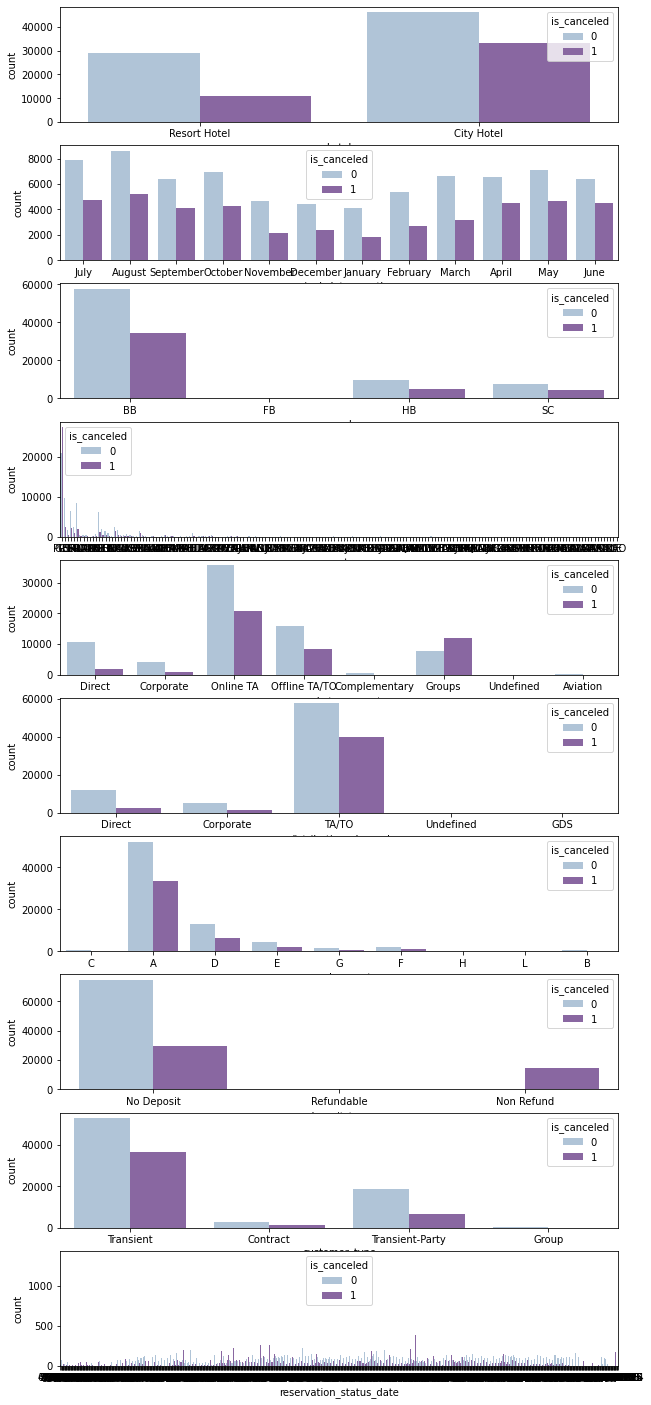

In [37]:
fig , ax = plt.subplots(10,1,figsize = (10,25))     # set up 10 x 1 frame count plot with figsize 10 x 25
for i , subplots in zip (categorical_variables, ax.flatten()):  
  sns.countplot(categorical_variables[i],hue = df2['is_canceled'],ax = subplots, palette = 'BuPu')
plt.show()

* In the example 'hotel' countplot, if the "Resort Hotel" and "City Hotel" bars are approximately the same height, it suggests a roughly balanced gender distribution. If one bar is significantly taller, it indicates an imbalanced distribution.

In [38]:
numerical_list = df2.loc[:, (df2.dtypes != object) & (df2.dtypes != str)].columns.tolist()

In [39]:
df_numerical = df2[numerical_list].describe().T
df_numerical['mode'] = df2[numerical_list].mode().values.T
df_numerical['unique'] = df2[numerical_list].nunique().values.T
df_numerical['range'] = round(df_numerical['max'] - df_numerical['min'], 2)
df_numerical['variance'] = round((df_numerical['std'])**2, 2)
df_numerical['IQR'] = round(df_numerical['75%']- df_numerical['25%'], 2)

central = ['mean', '25%', '50%', '75%', 'mode']
spread = ['min', 'max', 'range', 'std', 'variance', 'IQR']

df_numerical[['count', 'unique'] + central + spread]

count  unique         mean     25%  \
is_canceled                     119210.0       2     0.370766     0.0   
lead_time                       119210.0     479   104.109227    18.0   
arrival_date_year               119210.0       3  2016.156472  2016.0   
arrival_date_week_number        119210.0      53    27.163376    16.0   
arrival_date_day_of_month       119210.0      31    15.798717     8.0   
stays_in_weekend_nights         119210.0      17     0.927053     0.0   
stays_in_week_nights            119210.0      33     2.499195     1.0   
adults                          119210.0      14     1.859206     2.0   
children                        119210.0       5     0.104043     0.0   
babies                          119210.0       5     0.007961     0.0   
is_repeated_guest               119210.0       2     0.031499     0.0   
previous_cancellations          119210.0      15     0.087191     0.0   
previous_bookings_not_canceled  119210.0      73     0.137094     0.0   
booking_changes                 119210.0      19     0.218799     0.0   
agent                           119210.0     334    74.889078     7.0   
company                         119210.0     349    10.735400     0.0   
days_in_waiting_list            119210.0     127     2.321215     0.0   
adr                             119210.0    8866   101.969092    69.5   
required_car_parking_spaces     119210.0       5     0.062553     0.0   
total_of_special_requests       119210.0       6     0.571504     0.0   

                                    50%     75%    mode      min     max  \
is_canceled                        0.00     1.0     0.0     0.00     1.0   
lead_time                         69.00   161.0     0.0     0.00   737.0   
arrival_date_year               2016.00  2017.0  2016.0  2015.00  2017.0   
arrival_date_week_number          28.00    38.0    33.0     1.00    53.0   
arrival_date_day_of_month         16.00    23.0    17.0     1.00    31.0   
stays_in_weekend_nights            1.00     2.0     0.0     0.00    19.0   
stays_in_week_nights               2.00     3.0     2.0     0.00    50.0   
adults                             2.00     2.0     2.0     0.00    55.0   
children                           0.00     0.0     0.0     0.00    10.0   
babies                             0.00     0.0     0.0     0.00    10.0   
is_repeated_guest                  0.00     0.0     0.0     0.00     1.0   
previous_cancellations             0.00     0.0     0.0     0.00    26.0   
previous_bookings_not_canceled     0.00     0.0     0.0     0.00    72.0   
booking_changes                    0.00     0.0     0.0     0.00    18.0   
agent                              9.00   152.0     9.0     0.00   535.0   
company                            0.00     0.0     0.0     0.00   543.0   
days_in_waiting_list               0.00     0.0     0.0     0.00   391.0   
adr                               94.95   126.0    62.0    -6.38  5400.0   
required_car_parking_spaces        0.00     0.0     0.0     0.00     8.0   
total_of_special_requests          0.00     1.0     0.0     0.00     5.0   

                                  range         std  variance    IQR  
is_canceled                        1.00    0.483012      0.23    1.0  
lead_time                        737.00  106.875450  11422.36  143.0  
arrival_date_year                  2.00    0.707485      0.50    1.0  
arrival_date_week_number          52.00   13.601107    184.99   22.0  
arrival_date_day_of_month         30.00    8.781070     77.11   15.0  
stays_in_weekend_nights           19.00    0.995117      0.99    2.0  
stays_in_week_nights              50.00    1.897106      3.60    2.0  
adults                            55.00    0.575186      0.33    0.0  
children                          10.00    0.398836      0.16    0.0  
babies                            10.00    0.097509      0.01    0.0  
is_repeated_guest                  1.00    0.174663      0.03    0.0  
previous_cancellations            26.00    0.844918 

In [103]:
numerical_variables = df2[['lead_time', 'arrival_date_year', 'arrival_date_week_number','arrival_date_day_of_month',
                           'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                           'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                           'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
                           'required_car_parking_spaces', 'total_of_special_requests']]

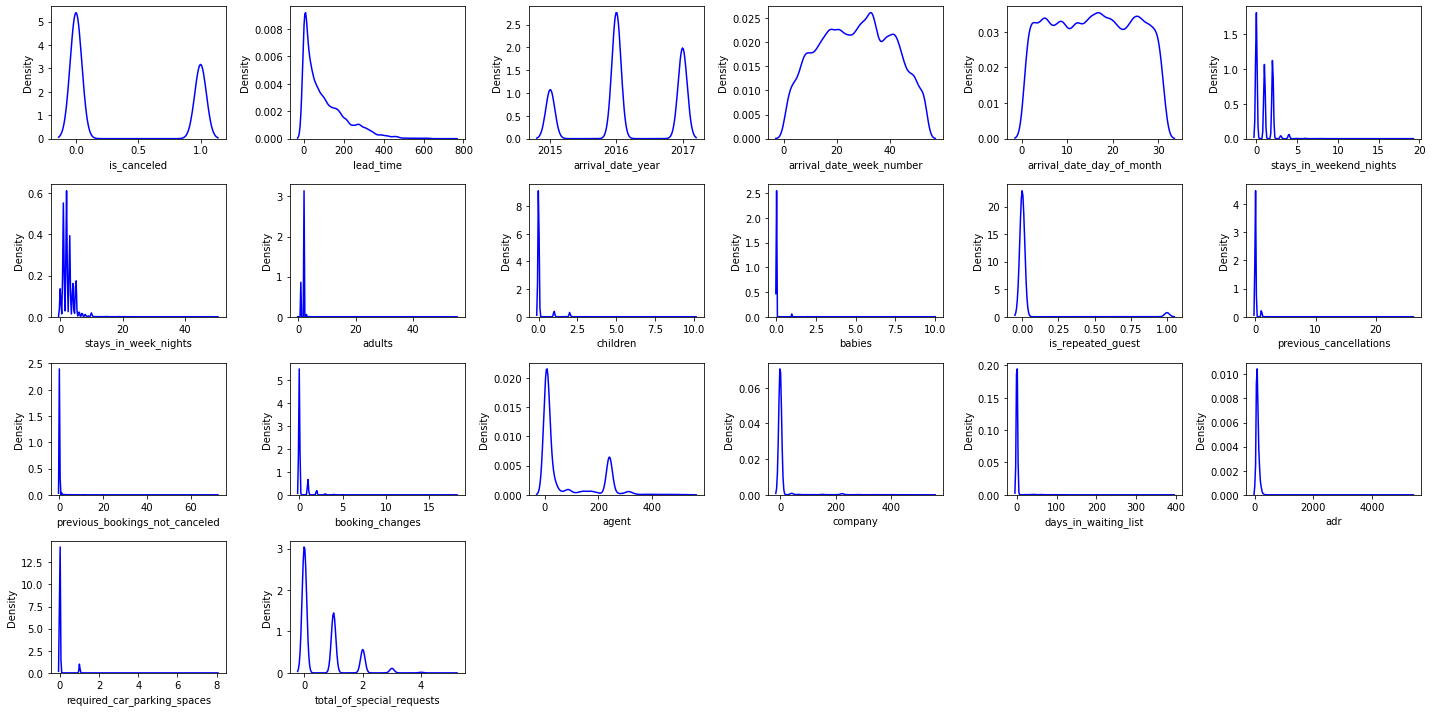

In [41]:
features = numerical_list
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(4, 6, i+1)
    sns.kdeplot(x=df2[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

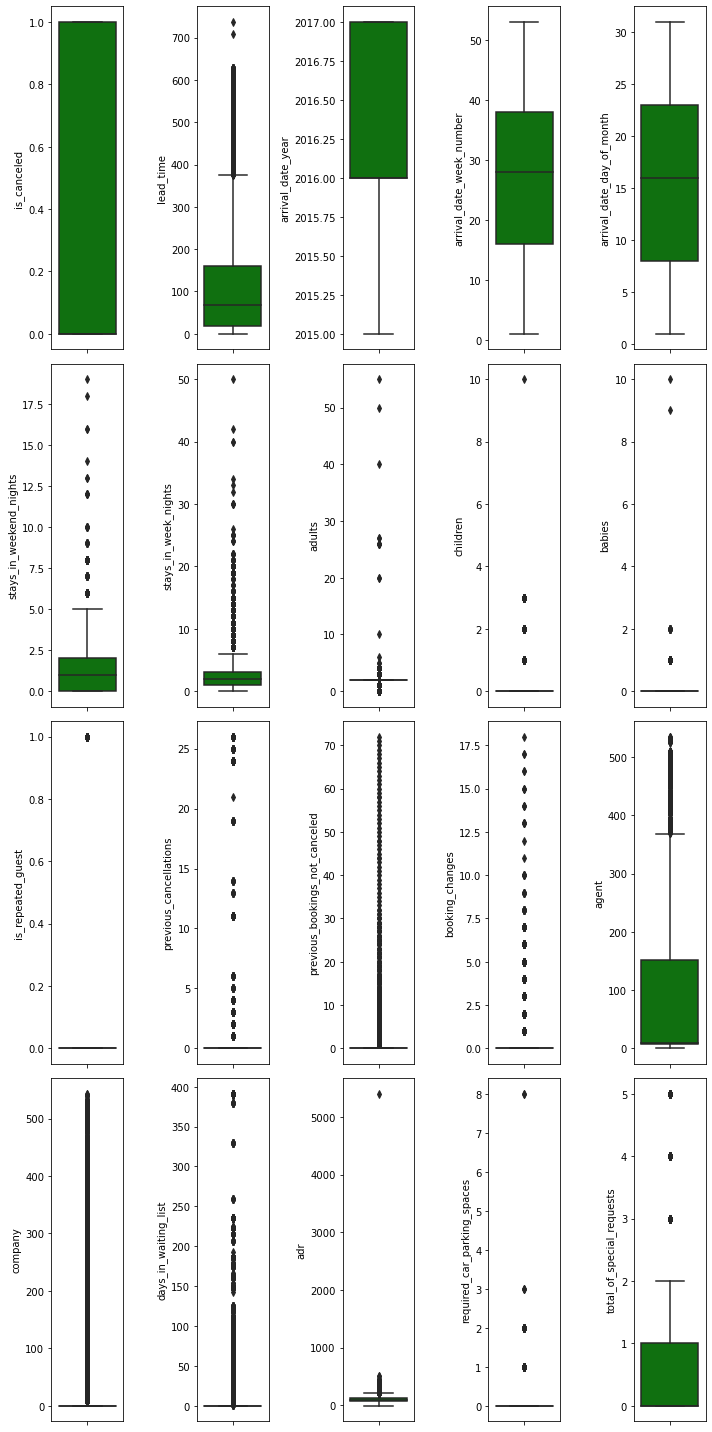

In [110]:
features = numerical_list
plt.figure(figsize=(10, 20))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df2[features[i]], color='green', orient='v')
    plt.tight_layout()

There is an outlier in some variables

## Multivariate Analysis

<AxesSubplot:>

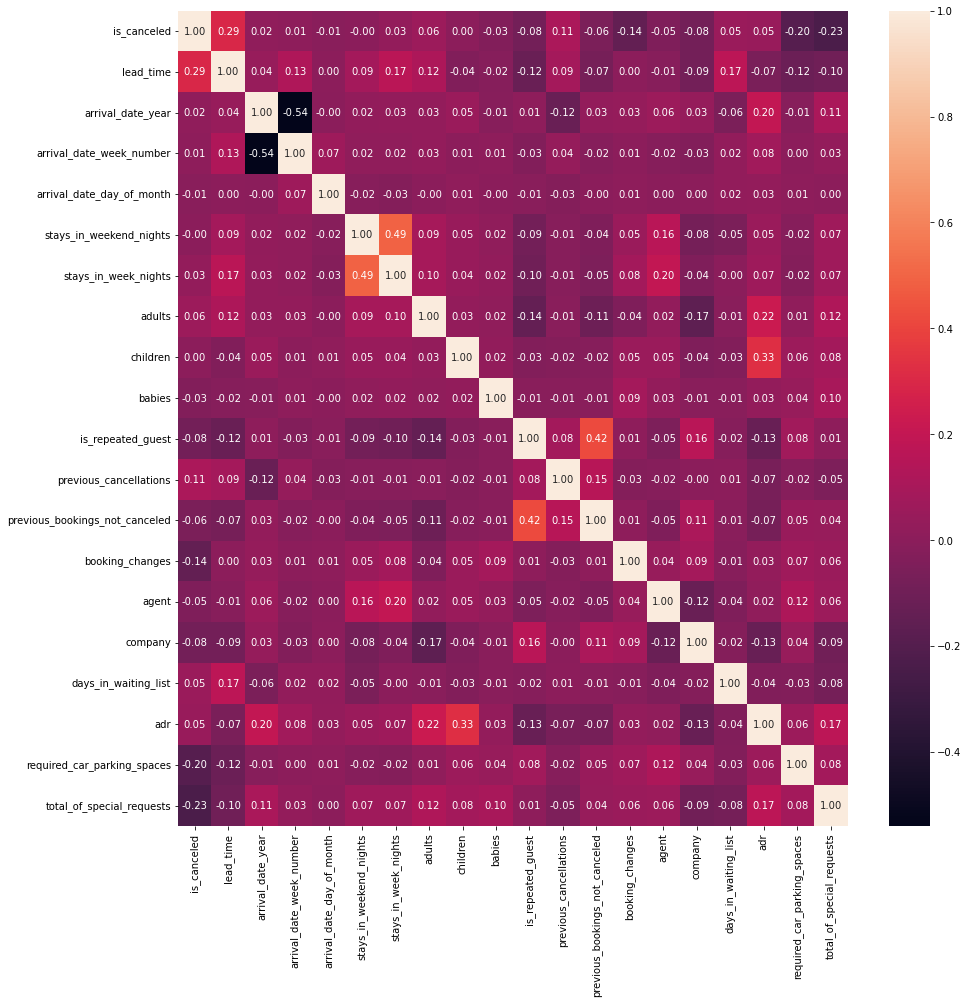

In [108]:
correlation = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, fmt='.2f')

* When two variables have a positive correlation (values closer to 1), they tend to increase together.
* For example, you can see a positive correlation between 'stays_in_weekend_nights' and 'stays_in_week_nights'.
* In the heatmap, there's a noticeable negative correlation between 'arrival_date_year' and 'arrival_date_week_number'.

## Where Do The Guest Come From?

In [43]:
guest_country=df2[df2['is_canceled']==0]['country'].value_counts().reset_index()
guest_country

index  country
0     PRT    20977
1     GBR     9668
2     FRA     8468
3     ESP     6383
4     DEU     6067
..    ...      ...
161   BHR        1
162   DJI        1
163   MLI        1
164   NPL        1
165   FRO        1

[166 rows x 2 columns]

In [44]:
guest_country=df2[df2['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns=['country','Number of guest']

In [45]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [46]:
total_guests = guest_country['Number of guest'].sum()
guest_country['guests in %'] = round(guest_country['Number of guest']/total_guests*100, 2)

In [47]:
guest_country

country  Number of guest  guests in %
0       PRT            20977        27.97
1       GBR             9668        12.89
2       FRA             8468        11.29
3       ESP             6383         8.51
4       DEU             6067         8.09
..      ...              ...          ...
161     BHR                1         0.00
162     DJI                1         0.00
163     MLI                1         0.00
164     NPL                1         0.00
165     FRO                1         0.00

[166 rows x 3 columns]

In [48]:
trace= go.Bar(
    x=guest_country['country'],
    y=guest_country['Number of guest'],
    marker=dict(color='blue')
)
data1 = [trace]
layout = go.Layout(
    title='Guests by Country'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

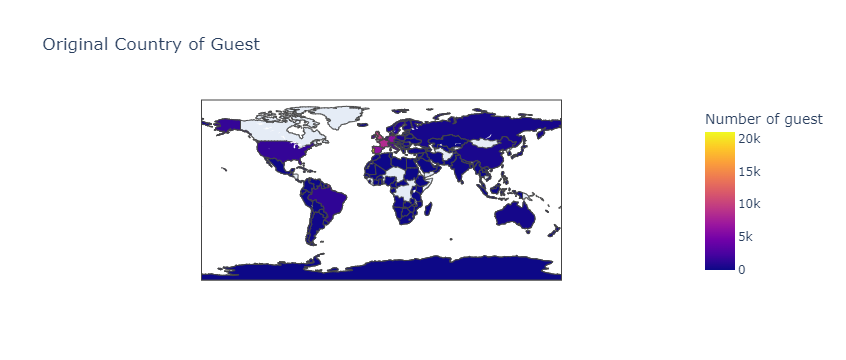

In [49]:
map_guest = px.choropleth(guest_country,
                          locations=guest_country['country'],
                          color=guest_country['Number of guest'],
                          hover_name=guest_country['country'],
                          title='Original Country of Guest')
map_guest.show()

The majority of the guests' original country of origin is from Europe, with a particular emphasis on Portugal, where the hotel is located.

## Number Resort and City Hotel per Night over The Month

In [50]:
resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled']==0)]
city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled']==0)]

In [51]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.322236
3            February   54.147478
4             January   48.708919
5                July  150.122528
6                June  107.921869
7               March   57.012487
8                 May   76.657558
9            November   48.681640
10            October   61.727505
11          September   96.416860

In [52]:
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.856824
1              August  118.412083
2            December   87.856764
3            February   86.183025
4             January   82.160634
5                July  115.563810
6                June  117.702075
7               March   90.170722
8                 May  120.445842
9            November   86.500456
10            October  101.745956
11          September  112.598452

In [53]:
adr_hotel=resort_hotel.merge(city_hotel,on='arrival_date_month')
adr_hotel.columns=['month','price_resort_hotel','price_city_hotel']
adr_hotel

month  price_resort_hotel  price_city_hotel
0       April           75.867816        111.856824
1      August          181.205892        118.412083
2    December           68.322236         87.856764
3    February           54.147478         86.183025
4     January           48.708919         82.160634
5        July          150.122528        115.563810
6        June          107.921869        117.702075
7       March           57.012487         90.170722
8         May           76.657558        120.445842
9    November           48.681640         86.500456
10    October           61.727505        101.745956
11  September           96.416860        112.598452

In [54]:
pip install sort-dataframeby-monthorweek

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install sorted-months-weekdays

Note: you may need to restart the kernel to use updated packages.


In [56]:
import sort_dataframeby_monthorweek as sd
adr_hotel=sd.Sort_Dataframeby_Month(df=adr_hotel, monthcolumnname='month')
adr_hotel

month  price_resort_hotel  price_city_hotel
0     January           48.708919         82.160634
1    February           54.147478         86.183025
2       March           57.012487         90.170722
3       April           75.867816        111.856824
4         May           76.657558        120.445842
5        June          107.921869        117.702075
6        July          150.122528        115.563810
7      August          181.205892        118.412083
8   September           96.416860        112.598452
9     October           61.727505        101.745956
10   November           48.681640         86.500456
11   December           68.322236         87.856764

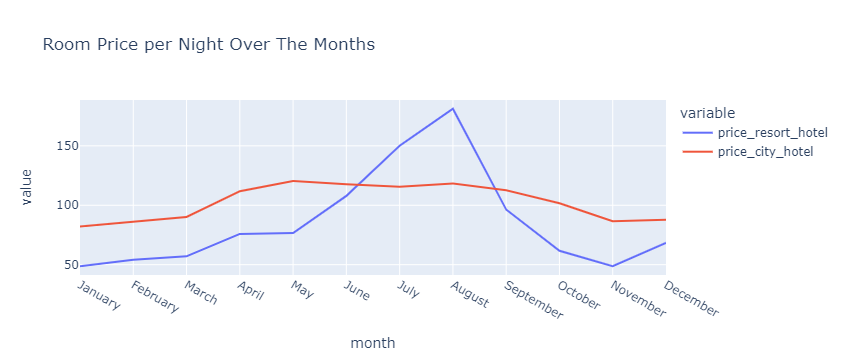

In [57]:
px.line(adr_hotel, x='month',
        y=['price_resort_hotel','price_city_hotel'],
        title='Room Price per Night Over The Months')

This represents the distribution of prices per month. The resort hotel has the highest prices in August, whereas the city hotel records its highest prices in May and August. It appears that the city hotel generally maintains higher prices than the resort hotel, which can be attributed to various factors such as the volume of bookings and the number of guests.

## How Much Do Guests Pay for a Room per Night

In [58]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

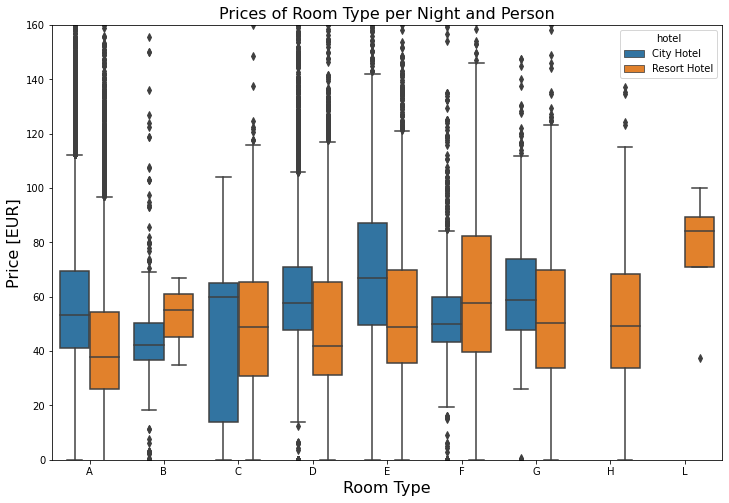

In [59]:
df['adr_updated']=df['adr']/(df['adults']+df['children'])
valid_guest=df.loc[df['is_canceled']==0]
prices = valid_guest[['hotel','reserved_room_type','adr_updated']].sort_values('reserved_room_type')

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
            y='adr_updated',
            hue='hotel',
            data=prices
           )
plt.title('Prices of Room Type per Night and Person', fontsize=16)
plt.xlabel('Room Type', fontsize=16)
plt.ylabel('Price [EUR]', fontsize=16)

plt.ylim(0, 160)
plt.show()

The points which are above this boxplot is called outliers that means these are the extreme data points. Some example if the price is usually 10 in some extreme cases it will be 1000. 10 to 1000 there is a lot of difference, these are called the outliers.

In [60]:
prices_C = prices[prices['reserved_room_type']=='C']
prices_C

hotel reserved_room_type  adr_updated
25853  Resort Hotel                  C    82.500000
26926  Resort Hotel                  C    60.250000
26108  Resort Hotel                  C    49.125000
26861  Resort Hotel                  C   162.000000
26535  Resort Hotel                  C    43.262500
...             ...                ...          ...
27439  Resort Hotel                  C    52.790000
29232  Resort Hotel                  C    29.666667
31571  Resort Hotel                  C    91.750000
27407  Resort Hotel                  C    85.215000
27233  Resort Hotel                  C    58.250000

[624 rows x 3 columns]

In [61]:
prices_City=prices_C[prices_C['hotel']=='City Hotel']
prices_Resort=prices_C[prices_C['hotel']=='Resort Hotel']
prices_Resort

hotel reserved_room_type  adr_updated
25853  Resort Hotel                  C    82.500000
26926  Resort Hotel                  C    60.250000
26108  Resort Hotel                  C    49.125000
26861  Resort Hotel                  C   162.000000
26535  Resort Hotel                  C    43.262500
...             ...                ...          ...
27439  Resort Hotel                  C    52.790000
29232  Resort Hotel                  C    29.666667
31571  Resort Hotel                  C    91.750000
27407  Resort Hotel                  C    85.215000
27233  Resort Hotel                  C    58.250000

[615 rows x 3 columns]

In [62]:
prices_City

hotel reserved_room_type  adr_updated
99432   City Hotel                  C         65.0
99431   City Hotel                  C         65.0
111027  City Hotel                  C          NaN
80557   City Hotel                  C         18.5
44693   City Hotel                  C         65.0
119278  City Hotel                  C        104.0
101137  City Hotel                  C         55.0
82508   City Hotel                  C          0.0
82509   City Hotel                  C          0.0

In [63]:
prices_Resort.describe()

adr_updated
count   615.000000
mean     50.549085
std      27.821397
min       0.000000
25%      31.000000
50%      49.000000
75%      65.562500
max     171.000000

In [64]:
prices_City.describe()

adr_updated
count      8.00000
mean      46.56250
std       36.86601
min        0.00000
25%       13.87500
50%       60.00000
75%       65.00000
max      104.00000

Some example in price_resort room type C, IQR=75%-25% =34, W = 1.5(34)= 51. 75%+W=116, 116 i sthe maximum of the boxplot, even based on describe the maximum is 171, it means the data above 116 is a outlier.

## How Long Does The Customer Stay

In [65]:
df3=df[df['is_canceled']==0]
df3['total_nights']=df3['stays_in_weekend_nights']+df3['stays_in_week_nights']

C:\Users\Farha\AppData\Local\Temp\ipykernel_10248\3587871988.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df3

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  ...  assigned_room_type booking_changes  \
0                            0  ...                   C               3   
1                   

In [67]:
df4=df3[['total_nights','hotel','is_canceled']]
df4

total_nights         hotel  is_canceled
0                  0  Resort Hotel            0
1                  0  Resort Hotel            0
2                  1  Resort Hotel            0
3                  1  Resort Hotel            0
4                  2  Resort Hotel            0
...              ...           ...          ...
119385             7    City Hotel            0
119386             7    City Hotel            0
119387             7    City Hotel            0
119388             7    City Hotel            0
119389             9    City Hotel            0

[75166 rows x 3 columns]

In [68]:
hotel_stay=df4.groupby(['total_nights','hotel']).agg('count').reset_index()
hotel_stay

total_nights         hotel  is_canceled
0              0    City Hotel          308
1              0  Resort Hotel          372
2              1    City Hotel         9169
3              1  Resort Hotel         6580
4              2    City Hotel        10992
..           ...           ...          ...
63            49    City Hotel            1
64            56  Resort Hotel            1
65            57    City Hotel            1
66            60  Resort Hotel            1
67            69  Resort Hotel            1

[68 rows x 3 columns]

In [69]:
hotel_stay=hotel_stay.rename(columns={'is_canceled':'Number of Stays'})
hotel_stay.head()

total_nights         hotel  Number of Stays
0             0    City Hotel              308
1             0  Resort Hotel              372
2             1    City Hotel             9169
3             1  Resort Hotel             6580
4             2    City Hotel            10992

In [70]:
hotel_stay_resort=hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_resort

total_nights         hotel  Number of Stays
1              0  Resort Hotel              372
3              1  Resort Hotel             6580
5              2  Resort Hotel             4488
7              3  Resort Hotel             3830
9              4  Resort Hotel             3321
11             5  Resort Hotel             1900
13             6  Resort Hotel             1206
15             7  Resort Hotel             4435
17             8  Resort Hotel              511
19             9  Resort Hotel              408
21            10  Resort Hotel              700
23            11  Resort Hotel              240
25            12  Resort Hotel               90
27            13  Resort Hotel               75
29            14  Resort Hotel              630
31            15  Resort Hotel               23
33            16  Resort Hotel               12
35            17  Resort Hotel               11
37            18  Resort Hotel                5
39            19  Resort Hotel                4
42            21  Resort Hotel               35
44            22  Resort Hotel                7
46            23  Resort Hotel                1
48            25  Resort Hotel               14
51            28  Resort Hotel               22
53            29  Resort Hotel                2
54            30  Resort Hotel                2
56            35  Resort Hotel                5
57            38  Resort Hotel                1
58            42  Resort Hotel                3
60            45  Resort Hotel                1
61            46  Resort Hotel                1
64            56  Resort Hotel                1
66            60  Resort Hotel                1
67            69  Resort Hotel                1

In [71]:
hotel_stay_city=hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_city

total_nights       hotel  Number of Stays
0              0  City Hotel              308
2              1  City Hotel             9169
4              2  City Hotel            10992
6              3  City Hotel            11895
8              4  City Hotel             7704
10             5  City Hotel             3221
12             6  City Hotel             1116
14             7  City Hotel             1251
16             8  City Hotel              209
18             9  City Hotel              120
20            10  City Hotel               83
22            11  City Hotel               36
24            12  City Hotel               35
26            13  City Hotel               16
28            14  City Hotel               29
30            15  City Hotel               16
32            16  City Hotel                6
34            17  City Hotel                4
36            18  City Hotel                1
38            19  City Hotel                2
40            20  City Hotel                1
41            21  City Hotel                1
43            22  City Hotel                3
45            23  City Hotel                1
47            24  City Hotel                1
49            27  City Hotel                1
50            28  City Hotel                1
52            29  City Hotel                1
55            34  City Hotel                1
59            43  City Hotel                1
62            48  City Hotel                1
63            49  City Hotel                1
65            57  City Hotel                1

In [72]:
trace1 =go.Bar(
    x=hotel_stay_resort['total_nights'],
    y=hotel_stay_resort['Number of Stays'],
    name='Resort Stay'
)

trace2 = go.Bar(
    x=hotel_stay_city['total_nights'],
    y=hotel_stay_city['Number of Stays'],
    name='City Stay'
)

df5 = [trace1,trace2]
layout = go.Layout(
    title='Total Number of Stays by Guest'
)
fig=go.Figure(data=df5, layout=layout)
pyo.plot(fig)

'temp-plot.html'

Many customer book city for 3 nights, and resort hotel for 1 night.

## Booking by Market Segment

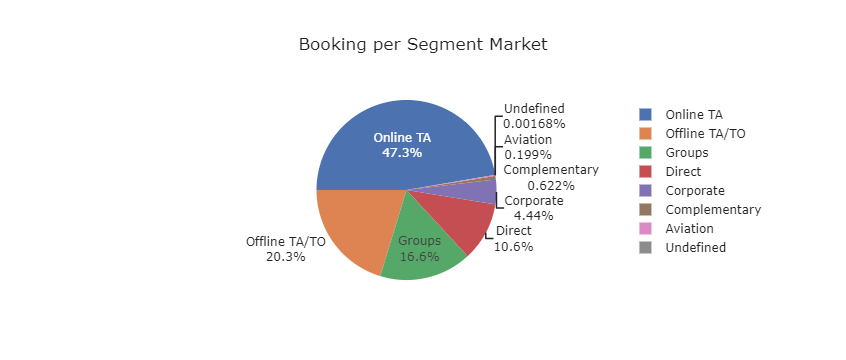

In [73]:
segments=df['market_segment'].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title='Booking per Segment Market',
             template='seaborn')
fig.update_traces(rotation=-90, textinfo='percent+label')
fig.show()

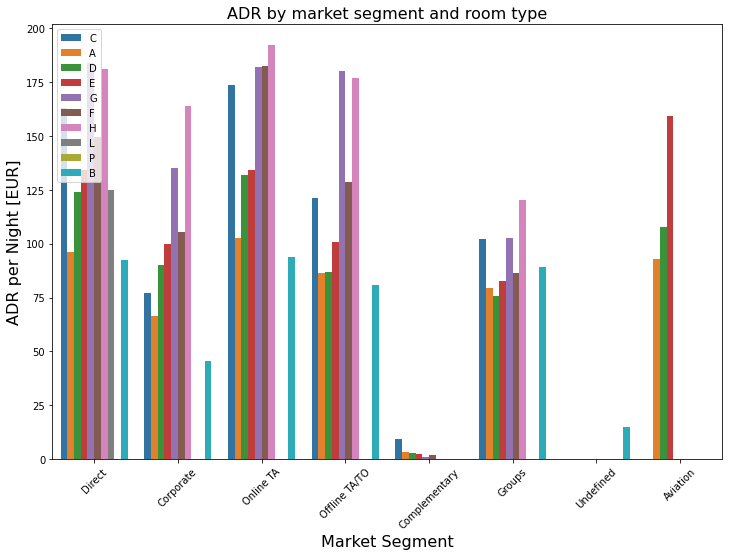

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(x='market_segment',
            y='adr',
            hue='reserved_room_type',
            data=df,
            ci=None)
plt.title('ADR by market segment and room type', fontsize=16)
plt.xlabel('Market Segment', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('ADR per Night [EUR]', fontsize=16)
plt.legend(loc='upper left')
plt.show()

## How Many Booking Were Canceled

In [75]:
cancel=df['is_canceled']==1

In [76]:
total_cancel = cancel.sum()
total_cancel

44224

In [77]:
resort_cancelation = df.loc[df['hotel']=='Resort Hotel']['is_canceled'].sum()
city_cancelation = df.loc[df['hotel']=='City Hotel']['is_canceled'].sum()

In [78]:
resort_cancelation

11122

In [79]:
city_cancelation

33102

In [80]:
print(f'Total Booking Canceled : {total_cancel} . ')
print(f'Total Resort Hotel Booking Canceled : {resort_cancelation} . ')
print(f'Total City Hotel Booking Canceled : {city_cancelation} . ')

Total Booking Canceled : 44224 . 
Total Resort Hotel Booking Canceled : 11122 . 
Total City Hotel Booking Canceled : 33102 . 


## Which Month Have The Highest Number of Cancelation

In [81]:
resort_book_per_month = df.loc[(df['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['hotel'].count()
resort_cancel_per_month = df.loc[(df['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

city_book_per_month = df.loc[(df['hotel'] == 'City Hotel')].groupby('arrival_date_month')['hotel'].count()
city_cancel_per_month = df.loc[(df['hotel'] == 'CIty Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

resort_cancel_data = pd.DataFrame({'Hotel': 'Resort Hotel',
                                   'Month': list(resort_book_per_month.index),
                                   'Booking': list(resort_book_per_month.values),
                                   'cancelations': list(resort_book_per_month.values)})
city_cancel_data = pd.DataFrame({'Hotel': 'City Hotel',
                                 'Month': list(city_book_per_month.index),
                                 'Booking': list(city_book_per_month.values),
                                 'cancelations': list(city_book_per_month.values)})
full_cancel_data = pd.concat([resort_cancel_data, city_cancel_data], ignore_index=True)

In [82]:
full_cancel_data

Hotel      Month  Booking  cancelations
0   Resort Hotel      April     3609          3609
1   Resort Hotel     August     4894          4894
2   Resort Hotel   December     2648          2648
3   Resort Hotel   February     3103          3103
4   Resort Hotel    January     2193          2193
5   Resort Hotel       July     4573          4573
6   Resort Hotel       June     3045          3045
7   Resort Hotel      March     3336          3336
8   Resort Hotel        May     3559          3559
9   Resort Hotel   November     2437          2437
10  Resort Hotel    October     3555          3555
11  Resort Hotel  September     3108          3108
12    City Hotel      April     7480          7480
13    City Hotel     August     8983          8983
14    City Hotel   December     4132          4132
15    City Hotel   February     4965          4965
16    City Hotel    January     3736          3736
17    City Hotel       July     8088          8088
18    City Hotel       June     7894          7894
19    City Hotel      March     6458          6458
20    City Hotel        May     8232          8232
21    City Hotel   November     4357          4357
22    City Hotel    October     7605          7605
23    City Hotel  September     7400          7400

In [83]:
import sort_dataframeby_monthorweek as sd
resort_cancel_data=sd.Sort_Dataframeby_Month(df=resort_cancel_data, monthcolumnname='Month')
resort_cancel_data

Hotel      Month  Booking  cancelations
0   Resort Hotel    January     2193          2193
1   Resort Hotel   February     3103          3103
2   Resort Hotel      March     3336          3336
3   Resort Hotel      April     3609          3609
4   Resort Hotel        May     3559          3559
5   Resort Hotel       June     3045          3045
6   Resort Hotel       July     4573          4573
7   Resort Hotel     August     4894          4894
8   Resort Hotel  September     3108          3108
9   Resort Hotel    October     3555          3555
10  Resort Hotel   November     2437          2437
11  Resort Hotel   December     2648          2648

In [84]:
import sort_dataframeby_monthorweek as sd
city_cancel_data=sd.Sort_Dataframeby_Month(df=city_cancel_data, monthcolumnname='Month')
city_cancel_data

Hotel      Month  Booking  cancelations
0   City Hotel    January     3736          3736
1   City Hotel   February     4965          4965
2   City Hotel      March     6458          6458
3   City Hotel      April     7480          7480
4   City Hotel        May     8232          8232
5   City Hotel       June     7894          7894
6   City Hotel       July     8088          8088
7   City Hotel     August     8983          8983
8   City Hotel  September     7400          7400
9   City Hotel    October     7605          7605
10  City Hotel   November     4357          4357
11  City Hotel   December     4132          4132

In [85]:
plt.figure(figsize=(12, 8))

trace3 =go.Bar(
    x=resort_cancel_data['Month'],
    y=resort_cancel_data['cancelations'],
    name='Resort Canceled'
)

trace4 = go.Bar(
    x=city_cancel_data['Month'],
    y=city_cancel_data['cancelations'],
    name='City Canceled'
)

df6 = [trace3,trace4]
layout = go.Layout(
    title='Total Number of Cancelation by Guest'
)
fig=go.Figure(data=df6, layout=layout)
pyo.plot(fig)

'temp-plot.html'

<Figure size 864x576 with 0 Axes>

## How Much Lead Time Guest Who Canceled the Book

In [86]:
df_lead_time=df[df['is_canceled']==1]['lead_time'].value_counts().reset_index()
df_lead_time.columns=['lead_time','Number of guest']
df_lead_time

lead_time  Number of guest
0            0              430
1           56              354
2           28              339
3           34              330
4            1              321
..         ...              ...
460        387                1
461        397                1
462        366                1
463        429                1
464        380                1

[465 rows x 2 columns]

In [87]:
trace= go.Bar(
    x=df_lead_time['lead_time'],
    y=df_lead_time['Number of guest'],
    marker=dict(color='blue')
)
data1 = [trace]
layout = go.Layout(
    title='Total Canceled by Lead Time'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

The Booking Lead Time is the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel. Based on data, The hotel have various time between confirming a reservation to their arrival date. Less management of lead time can effect the revenue of the hotel.

# Conclusion

* The data does not contain major issues. There are only some NULL values and the data do not have duplicated rows. I've handled the null values accordingly.

* Most of the columns have asymmetrical distribution.

* There is an outlier in some variables.

* The majority of the guests' original country of origin is from Europe, with a particular emphasis on Portugal, where the hotel is located.

* From correlation heatmap, there is  positive correlation between 'stays_in_weekend_nights' and 'stays_in_week_nights'. And there's a noticeable negative correlation between 'arrival_date_year' and 'arrival_date_week_number'.